In [1]:
import pickle
import os
import matplotlib.pyplot as plt
os.chdir("..")

In [2]:
os.getcwd()

'C:\\Users\\Dongmin Kim\\Documents\\DeepTSAD'

## Load

In [3]:
from data.load_data import DataFactory

In [4]:
datafactory = DataFactory()

In [5]:
train_X, train_y, test_X, test_y = datafactory.load_WADI()

Reading WADI...
train: X - (784571, 123), y - (784571,)
test: X - (172803, 123), y - (172803,)
Loading complete.


## Stats

In [6]:
import numpy as np

In [7]:
print("=== statistics ===")
train_len, F = train_X.shape
test_len, _ = test_X.shape
anomaly_count = np.count_nonzero(test_y)
print(f"[Train] total: {train_len}, num_features: {F}")
print(f"[Test] total: {test_len}, anomaly / total: {anomaly_count}/{len(test_y)} = {anomaly_count/len(test_y):.3f}")

=== statistics ===
[Train] total: 784571, num_features: 123
[Test] total: 172803, anomaly / total: 9977/172803 = 0.058


## Visualize

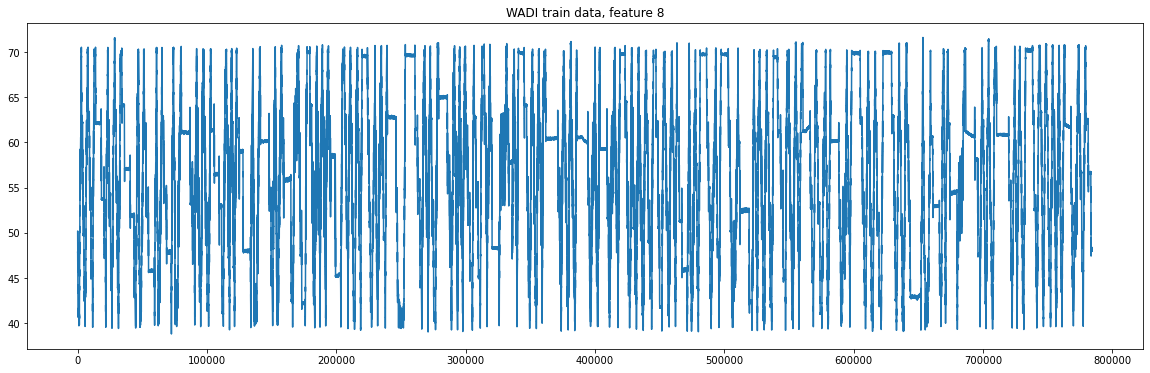

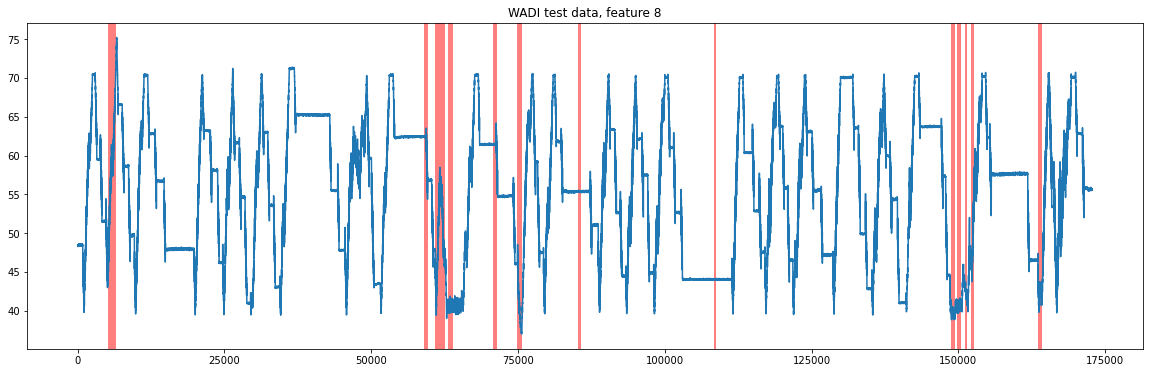

In [8]:
F = 8
dataset = "WADI"
datafactory.visualize_dataset(train_X, train_y, test_X, test_y, dataset_name=dataset, feature_idx=F)